The goal of this project is to explore whether student academic performance can be predicted using basic demographic and educational background information. Regression analysis was chosen to evaluate how factors such as gender, lunch type, and test preparation course relate to a student’s overall academic score.

The Student Performance dataset was selected because it represents a realistic educational scenario and contains a mix of categorical and numerical features commonly used in educational data analysis. By applying regression models to this dataset, the project aims to assess the limitations of predictive modeling when only surface-level student attributes are available, and to understand whether more complex models can improve prediction accuracy.

In [45]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("StudentsPerformance.csv")

# Make a clean copy
data = df.copy()

# Rename columns for easier use
data.columns = [col.strip().lower().replace("/", "_").replace(" ", "_") for col in data.columns]

# Check basic structure
print("Shape of dataset:", data.shape)
data.head()


Shape of dataset: (1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
data["total_score"] = (
    data["math_score"] + 
    data["reading_score"] + 
    data["writing_score"]
)

In [48]:
X = data[
    [
        "gender",
        "race_ethnicity",
        "parental_level_of_education",
        "lunch",
        "test_preparation_course"
    ]
]

y = data["total_score"]

In [49]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [50]:
X_encoded.head()

,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,False,True,False,False,False,True,False,False,False,False,True,True
1,False,False,True,False,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,True,True


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

In [52]:
from sklearn.linear_model import LinearRegression

# Initialise model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [53]:
y_pred = model.predict(X_test)

In [54]:
pd.DataFrame({
    "Actual": y_test.values[:5],
    "Predicted": y_pred[:5]
})

,Actual,Predicted
0,261,211.568318
1,192,201.842843
2,225,218.387825
3,224,169.107478
4,245,235.490370


In [55]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 31.47054712262788
RMSE: 40.20473953436483
R² Score: 0.16217185763155206


In [56]:
# Model Interpretation
coefficients = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients

,Feature,Coefficient
10,lunch_standard,27.622964
4,race_ethnicity_group E,17.880636
3,race_ethnicity_group D,11.342573
5,parental_level_of_education_bachelor's degree,10.506305
7,parental_level_of_education_master's degree,5.785181
2,race_ethnicity_group C,2.753804
1,race_ethnicity_group B,-0.419493
8,parental_level_of_education_some college,-2.562309
9,parental_level_of_education_some high school,-9.818988
0,gender_male,-12.275566


In [57]:
# Improving the Model by adding Polynomial Features 

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [58]:
# Train Regression Again
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

In [59]:
# Evaluate the Upgraded Model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial MAE:", mae_poly)
print("Polynomial RMSE:", rmse_poly)
print("Polynomial R²:", r2_poly)

Polynomial MAE: 34.10654700966867
Polynomial RMSE: 43.69400512867092
Polynomial R²: 0.010435404140125004


The evaluation metrics indicate that improved regression approaches did not increase model performance. Despite using polynomial regression, prediction errors increased but explained variance remained extremely low.

This shows that demographic factors alone cannot effectively predict student performance. Additional factors that are not included in this dataset, such as study habits, learning environment, motivation, and institutional support, are likely to influence academic outcomes.

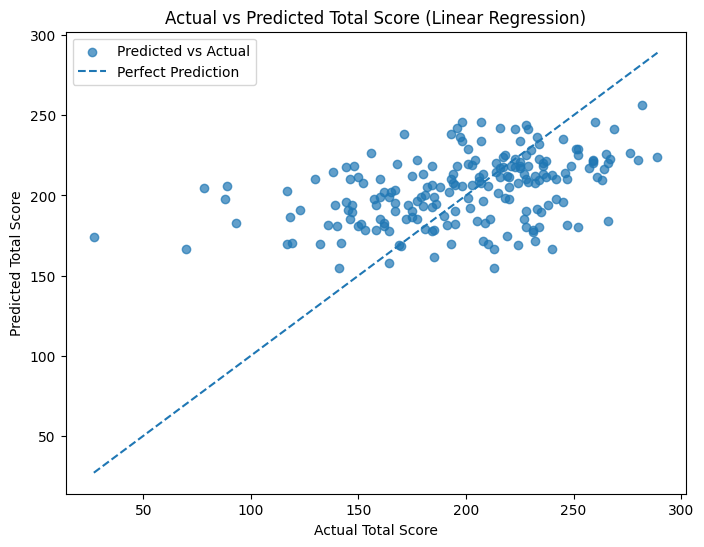

In [61]:
# Actual vs Predicted Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual")

# Reference line 
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--",
    label="Perfect Prediction"
)

plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("Actual vs Predicted Total Score (Linear Regression)")
plt.legend()
plt.show()


The scatter plot compares students' actual total scores to the scores predicted by the linear regression model. Ideally, if the model were highly accurate, most points would lie close to a straight diagonal line, indicating that predictions closely match actual values.

In this case, the points are fairly distributed, showing noticeable differences between actual and predicted scores. While the model can detect a general upward trend, it struggles to make specific predictions for individual students. This indicates that the relationship between input features and total score is not sufficient to make an accurate prediction using a simple linear model alone.